In [1]:
import numpy as np
from gp_tools.tem import ForwardTEM
from gp_tools.core import TEMfile
forward_solver = ForwardTEM()
import pandas as pd

In [2]:
import os
print(os.getcwd())


c:\Users\jakob\Documents\Meine Ordner\TU\Geophysik\GP_repo_fork\geophysics\tutorials\TEM


In [3]:
# Set loop size in meters (side length of the square loop)
forward_solver.loop = 15

# Choose the current key: 1 or 4 (A)
forward_solver.currentkey = 4

# Choose time key: 1 - 9 (number of timegates)
forward_solver.timekey = 7

In [4]:
forward_solver.clear_plot()
forward_solver.track = True

Cleared plots from memory.


calc_response in empymod_frwrd Nr:1

Model in empymod_frwrd.calc_response: [[1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 1.0e+02 8.0e-01 5.0e-04 9.0e-01]
 [1.5e+00 1.0e+02 8.0e-01 5.0e-04 9.0e-01]
 [1.5e+00 1.0e+02 8.0e-01 5.0e-04 9.0e-01]
 [1.5e+00 1.0e+02 8.0e-01 5.0e-04 9.0e-01]
 [1.5e+00 1.0e+02 8.0e-01 5.0e-04 9.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [1.5e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]
 [0.0e+00 5.0e+01 0.0e+00 1.0e-06 1.0e-01]]


Resistivity Model in empymod_frwrd.calc_response: {'res': array([2.e+14, 5.e+01, 5.e+01, 5.e+01, 5.e+01, 5.e+01, 1.e+02, 1.e+02,
       1.e+02, 1.e+02, 1.e+02, 5.e+01, 5.e+01, 5.e+01, 5.e+01, 5.e+01,
       5.e+01]), 'rho_0': array([2

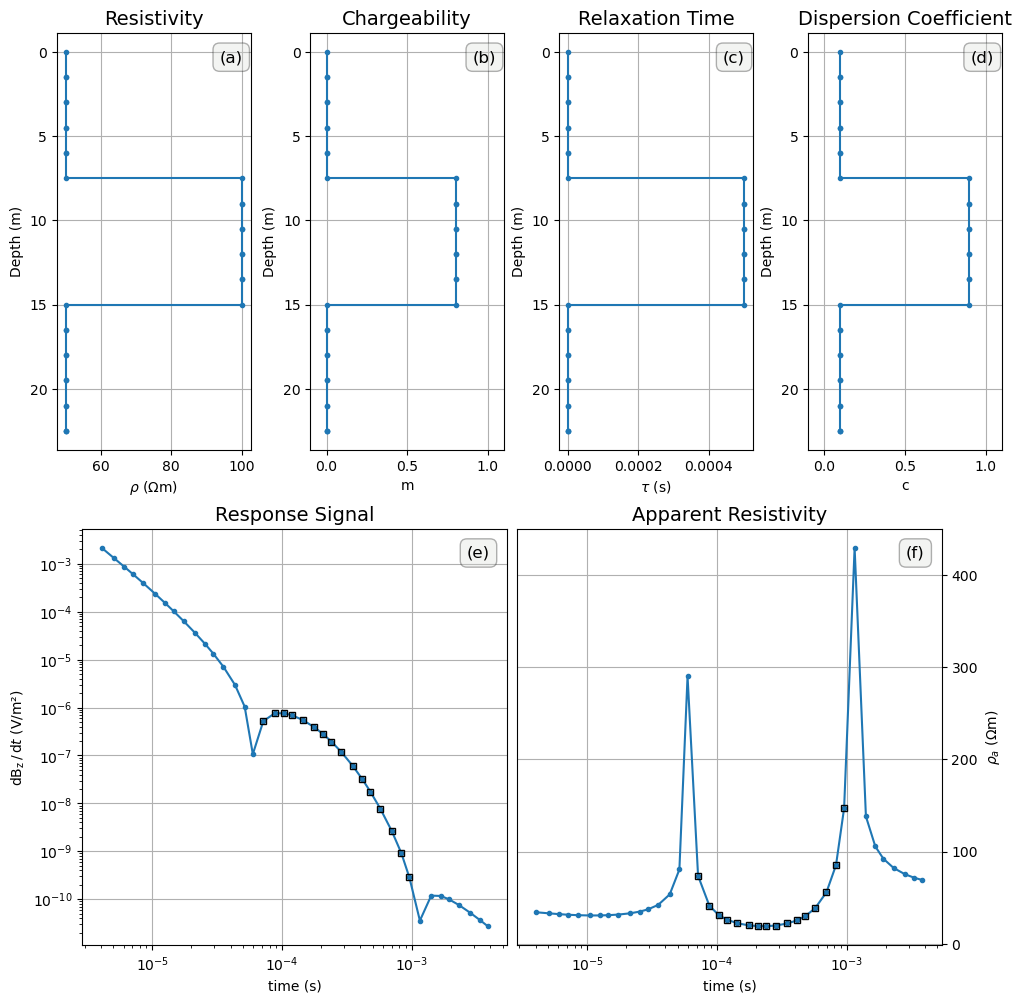

In [5]:
# Thickness of each layer in meters
thk = [1.5 for i in range(15)]

# Direct current resistivity of each layer in Ohm meters
rho_0 = [50,50,50,50,50,
         100,100,100,100,100,
         50,50,50,50,50]

# Chargeability of each layer 0<=m<=1
m = [0,0,0,0,0,
     0.8,0.8,0.8,0.8,0.8,
     0,0,0,0,0]

# Relaxation time of each layer in seconds
tau = [1e-6,1e-6,1e-6,1e-6,1e-6,
       5e-4,5e-4,5e-4,5e-4,5e-4,
       1e-6,1e-6,1e-6,1e-6,1e-6,]

# Dispersion coefficient of each layer 0<=c<=1
c = [0.1,0.1,0.1,0.1,0.1,
    0.9,0.9,0.9,0.9,0.9,
     0.1,0.1,0.1,0.1,0.1]

forward_solver.add_pelton_model(
                    thickness=thk, 
                    resistivity=rho_0,
                    chargeability=m,
                    relaxation_time=tau,
                    dispersion_coefficient=c)

forward_solver.run()
forward_solver.savefig('./results/numerical/pelton/pelton_Model.png')


In [14]:
data = {'Channel':[i for i in range(1,len(forward_solver.response_times)+1)],
        'Time': forward_solver.response_times,
        'E/I[V/A]': forward_solver.response_signal,
        'Err[V/A]': forward_solver.relative_error,
        'Res[Ohm-m]': forward_solver.response_rhoa,}

data_dict = {'N001':{'data':pd.DataFrame(data),
             'metadata':{'device':'TEMfast', 'date':'2025-06-25', 
            'place':'numerical', 
            'name':'N001', 
            'timerange':float(forward_solver.timekey), 'stacks':5, 'deff':3, 'current':float(forward_solver.currentkey), 'filter':float(forward_solver.filter_powerline), 'amplifier':'OFF', 
            'tloop':float(forward_solver.loop), 'rloop':float(forward_solver.loop), 'turn':'1', 
            'comments':'15-60', 
            'x':0, 'y':0, 'z':0}}}
TEMfile.write(data=data_dict, filepath='./results/numerical/pelton/pelton_Model.tem')

['{device}\tDate:\t{date}', 'Place:\t{place}', '#Set\t{name}', 'Time-Range\t{timerange}\tStacks\t{stacks}\tdeff= {deff} us\tI={current} A\tFILTR={filter} Hz\tAMPLIFER={amplifier}', 'T-LOOP (m)\t{tloop:.3f}\tR-LOOP (m)\t{rloop:.3f}\tTURN=\t{turn}', 'Comments:\t{comments}', 'Location:x=\t{x:+.3f}\ty=\t{y:+.3f}\tz=\t{z:+.3f}']
